# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save both a CSV of all data retrieved and png images for each scatter plot.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import urllib
from pprint import pprint


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:

lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

#Indentify nearest city for each lat,lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(len(cities))
cities_df=pd.DataFrame(cities)
cities_df.head()


604


,0
0,adrar
1,katsuura
2,hilo
3,kruisfontein
4,yellowknife


In [22]:
# testing if citypy is working
city1 = citipy.nearest_city(30.99, 122.21)
city1.city_name


'shanghai'

In [32]:
api_key ="98defd9f1f765b0a1418454ae356d125"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")




# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        #retrieve data
        city_weather = requests.get(city_url).json()

        # max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 

print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | veraval
Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | milan
Processing Record 8 of Set 1 | hrob
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | nelson
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | gorom-gorom
Processing Record 17 of Set 1 | yabrud
Processing Record 18 of Set 1 | nyagan
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | barrow
Processing Record 22 

Processing Record 30 of Set 4 | jumla
Processing Record 31 of Set 4 | gerzat
Processing Record 32 of Set 4 | kapit
Processing Record 33 of Set 4 | gigmoto
Processing Record 34 of Set 4 | kavieng
Processing Record 35 of Set 4 | colac
Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | shalinskoye
Processing Record 38 of Set 4 | amurzet
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | japura
Processing Record 41 of Set 4 | hede
Processing Record 42 of Set 4 | maragogi
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | dondo
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | palmer
Processing Record 0 of Set 5 | lokosovo
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | staryy nadym
Processing Record 3 of Set

Processing Record 21 of Set 8 | narsaq
Processing Record 22 of Set 8 | lethem
Processing Record 23 of Set 8 | bandarbeyla
Processing Record 24 of Set 8 | uyo
Processing Record 25 of Set 8 | ewa beach
Processing Record 26 of Set 8 | puerto baquerizo moreno
Processing Record 27 of Set 8 | nouakchott
Processing Record 28 of Set 8 | hobyo
Processing Record 29 of Set 8 | coahuayana
Processing Record 30 of Set 8 | lakatoro
Processing Record 31 of Set 8 | balakhninskiy
Processing Record 32 of Set 8 | tungkang
City not found. Skipping...
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | toora-khem
Processing Record 35 of Set 8 | avanigadda
Processing Record 36 of Set 8 | plouzane
Processing Record 37 of Set 8 | minab
Processing Record 38 of Set 8 | lata
Processing Record 39 of Set 8 | saint-georges
Processing Record 40 of Set 8 | altay
Processing Record 41 of Set 8 | gravdal
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 

City not found. Skipping...
Processing Record 10 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 12 | chapais
Processing Record 12 of Set 12 | antofagasta
Processing Record 13 of Set 12 | bubaque
Processing Record 14 of Set 12 | egvekinot
Processing Record 15 of Set 12 | sampit
Processing Record 16 of Set 12 | safford
Processing Record 17 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 18 of Set 12 | tukrah
City not found. Skipping...
Processing Record 19 of Set 12 | taburi
City not found. Skipping...
Processing Record 20 of Set 12 | suratgarh
Processing Record 21 of Set 12 | rungata
City not found. Skipping...
Processing Record 22 of Set 12 | verkhoyansk
Processing Record 23 of Set 12 | zaranj
Processing Record 24 of Set 12 | vestmanna
Processing Record 25 of Set 12 | okhotsk
Processing Record 26 of Set 12 | pa sang
Processing Record 27 of Set 12 | ambulu
Processing Record 28 of Set 12 | pointe-noire
Processing Record 

In [37]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          524
Cloudiness    524
Country       524
Date          524
Humidity      524
Lat           524
Lng           524
Max Temp      524
Wind Speed    524
dtype: int64

In [38]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,0,KI,1541215384,100,3.07,172.79,84.82,7.74
1,tiksi,0,RU,1541215385,61,71.64,128.87,-13.29,3.71
2,punta arenas,75,CL,1541210400,66,-53.16,-70.91,48.20,9.17
3,veraval,0,FR,1541214000,95,49.65,0.71,41.00,5.82
4,cockburn town,92,TC,1541215385,98,21.46,-71.14,82.30,21.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

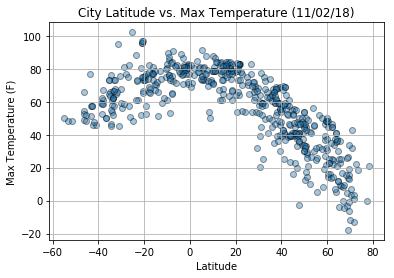

In [40]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Max_Temperature.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

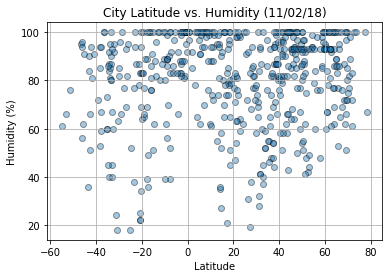

In [42]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

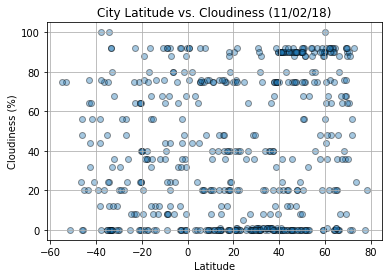

In [43]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

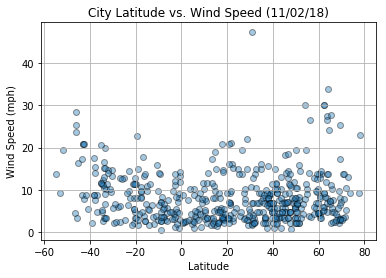

In [44]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind Speed.png")

# Show plot
plt.show()

